In [2]:
import pandas as pd


In [4]:
RTH = pd.read_csv('CDK_RTH/21_MAY_RTH.csv')

In [5]:
RTH.columns

Index(['RO-NO...\n', 'BOOKED.\nDATE', 'CLOSED.\nDATE', 'DT\n', 'TECH...\nNO',
       'LN\n', 'SEQ\nNO', 'M\n', 'HT\n', 'SC\n', 'LBR..\nTYPE', 'PAY.\nTYPE',
       'ACTUAL.\nHOURS', 'SOLD...\nHOURS', 'SOLD......\nAMOUNT',
       'LABOR.....\nCOST', 'OP-CODE...\n', 'DESCRIPTION..\n', 'Unnamed: 18'],
      dtype='object')

In [6]:
df = RTH.dropna()

In [7]:
df.columns


Index(['RO-NO...\n', 'BOOKED.\nDATE', 'CLOSED.\nDATE', 'DT\n', 'TECH...\nNO',
       'LN\n', 'SEQ\nNO', 'M\n', 'HT\n', 'SC\n', 'LBR..\nTYPE', 'PAY.\nTYPE',
       'ACTUAL.\nHOURS', 'SOLD...\nHOURS', 'SOLD......\nAMOUNT',
       'LABOR.....\nCOST', 'OP-CODE...\n', 'DESCRIPTION..\n', 'Unnamed: 18'],
      dtype='object')

In [8]:
df.head()

,RO-NO...\n,BOOKED.\nDATE,CLOSED.\nDATE,DT\n,TECH...\nNO,LN\n,SEQ\nNO,M\n,HT\n,SC\n,LBR..\nTYPE,PAY.\nTYPE,ACTUAL.\nHOURS,SOLD...\nHOURS,SOLD......\nAMOUNT,LABOR.....\nCOST,OP-CODE...\n,DESCRIPTION..\n,Unnamed: 18
0,167745,06MAY21,06MAY21,S1,99999,E,5,,ST,,ISM,ROP,0.0,0.3,30.00,15,FUEL,FUEL INDUCTIO,\r
2,167745,06MAY21,06MAY21,S1,99999,G,7,,ST,,ISD,ROP,0.0,0.0,212.31,0,UCD,RUDYS EXPRESS,\r
4,168575,07MAY21,13MAY21,S1,99999,D,4,,ST,,WS4,ROP,0.0,0.0,250.00,0,LOANER,LOANER VEHICL,\r
6,168725,11MAY21,11MAY21,S1,99999,D,5,*,ST,,ISM,ROP,0.0,-1.0,0.00,-50,RECALL,NO PARTS AVAI,\r
8,169041,12MAY21,12MAY21,S1,99999,D,5,,ST,,ISM,ROP,0.0,0.0,0.00,0,RECALL,RECALL PERFOR,\r


In [9]:
Renamed_df = df.rename(columns={'RO-NO...\n':'RO_NO','BOOKED.\nDATE':'BOOKED', 'CLOSED.\nDATE': 'CLOSED_DATE',\
                    'TECH...\nNO':'TECH_NO','LN\n':'LINE','LBR..\nTYPE':'LABOR_TYPE',\
                    'ACTUAL.\nHOURS':'ACTUAL_HOURS', 'SOLD...\nHOURS':'SOLD-HOURS',\
                    'OP-CODE...\n':'OP_CODE', 'DESCRIPTION..\n':'DESCRIPTION'})

In [10]:
Scrubed_RTH = Renamed_df[['RO_NO','BOOKED','CLOSED_DATE',\
                    'TECH_NO','LINE','LABOR_TYPE','ACTUAL_HOURS','SOLD-HOURS',\
                    'OP_CODE','DESCRIPTION']]

In [11]:
Scrubed_RTH.head()

,RO_NO,BOOKED,CLOSED_DATE,TECH_NO,LINE,LABOR_TYPE,ACTUAL_HOURS,SOLD-HOURS,OP_CODE,DESCRIPTION
0,167745,06MAY21,06MAY21,99999,E,ISM,0.0,0.3,FUEL,FUEL INDUCTIO
2,167745,06MAY21,06MAY21,99999,G,ISD,0.0,0.0,UCD,RUDYS EXPRESS
4,168575,07MAY21,13MAY21,99999,D,WS4,0.0,0.0,LOANER,LOANER VEHICL
6,168725,11MAY21,11MAY21,99999,D,ISM,0.0,-1.0,RECALL,NO PARTS AVAI
8,169041,12MAY21,12MAY21,99999,D,ISM,0.0,0.0,RECALL,RECALL PERFOR


In [12]:
df = Scrubed_RTH.groupby('TECH_NO')['SOLD-HOURS'].sum()
df2 = pd.DataFrame(df)
df3 = df2.reset_index(inplace=False)
df3
tech_list = df3['TECH_NO']
tech_list
techlist = []
for tech in tech_list:
    techlist.append(tech)
    
techlist

['        ',
 '     ***',
 '  3   ST',
 '  4   ST',
 '165515',
 '178894',
 '188507',
 '197655',
 '199431',
 '199678',
 '201138',
 '203659',
 '204777',
 '205155',
 '206080',
 '207992',
 '209725',
 '210186',
 '210630',
 '211250',
 '211273',
 '229209',
 '229933',
 '238941',
 '238987',
 '239080',
 '239669',
 '239726',
 '99999']

In [17]:
len(techlist)

29

In [19]:
active = df3.iloc[4:29,:]
print(active)

   TECH_NO  SOLD-HOURS
4   165515      159.54
5   178894      258.80
6   188507      112.81
7   197655       10.26
8   199431      214.19
9   199678       63.36
10  201138      206.67
11  203659      193.60
12  204777       96.00
13  205155       54.80
14  206080      190.45
15  207992       94.80
16  209725      114.40
17  210186      127.07
18  210630      231.87
19  211250      280.20
20  211273      224.30
21  229209       29.80
22  229933      148.05
23  238941      102.00
24  238987      142.40
25  239080       98.75
26  239669      106.00
27  239726        4.70
28   99999        4.70


In [22]:
active
newactive = active.reset_index()
newactive

,index,TECH_NO,SOLD-HOURS
0,4,165515,159.54
1,5,178894,258.80
2,6,188507,112.81
3,7,197655,10.26
4,8,199431,214.19
5,9,199678,63.36
6,10,201138,206.67
7,11,203659,193.60
8,12,204777,96.00
9,13,205155,54.80


In [23]:
newactive

,index,TECH_NO,SOLD-HOURS
0,4,165515,159.54
1,5,178894,258.80
2,6,188507,112.81
3,7,197655,10.26
4,8,199431,214.19
5,9,199678,63.36
6,10,201138,206.67
7,11,203659,193.60
8,12,204777,96.00
9,13,205155,54.80


NameError: name 'sort_columns' is not defined

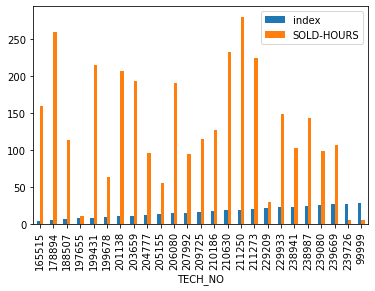

In [24]:
newactive.plot(kind='bar', x='TECH_NO')
sort_columns